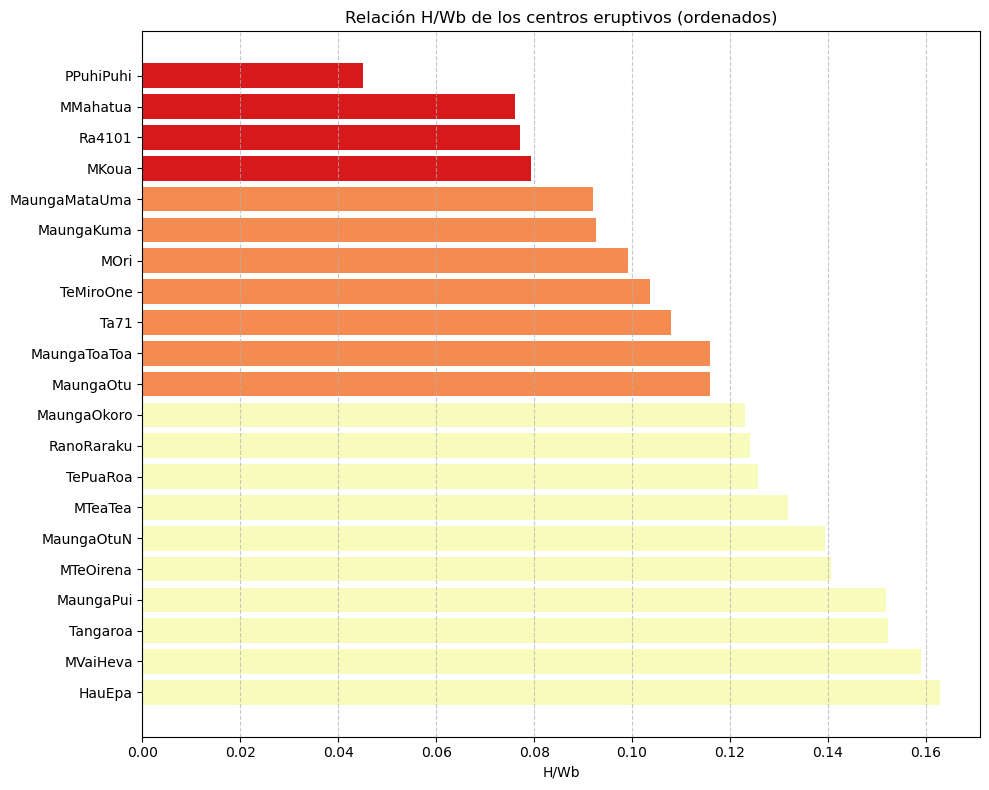

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

##cargar datos
ruta = r"C:\Users\56931\Documents\MORVOLCFINAL.xlsx"
df_full = pd.read_excel(ruta, sheet_name="Hoja1")

##ajuste filas y columnas
df = df_full.iloc[1:].copy()
df.columns = df_full.iloc[0]
df = df[["Nombres", "ID_Map", "H/Wb"]].dropna(subset=["H/Wb"])

##seleccion de columna y limpieza de filas sin h/wb
df["H/Wb"] = pd.to_numeric(df["H/Wb"], errors="coerce")
df = df.dropna(subset=["H/Wb"])

##clasificaicon con colores
def clasificar_color(hwb):
    if hwb < 0.08:
        return "#d7191c"  # rojo
    elif hwb < 0.12:
        return "#f48b51"  # naranja claro
    else:
        return "#f7fcbc"  # amarillo pálido

df["Color"] = df["H/Wb"].apply(clasificar_color)

##ordenar
df = df.sort_values("H/Wb")

##plot; invertaxis para que vaya de menor a mayor hacia abajo
plt.figure(figsize=(10, 8))
plt.barh(df["Nombres"], df["H/Wb"], color=df["Color"])
plt.xlabel("H/Wb")
plt.title("Relación H/Wb de los centros eruptivos (ordenados)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()  
plt.show()


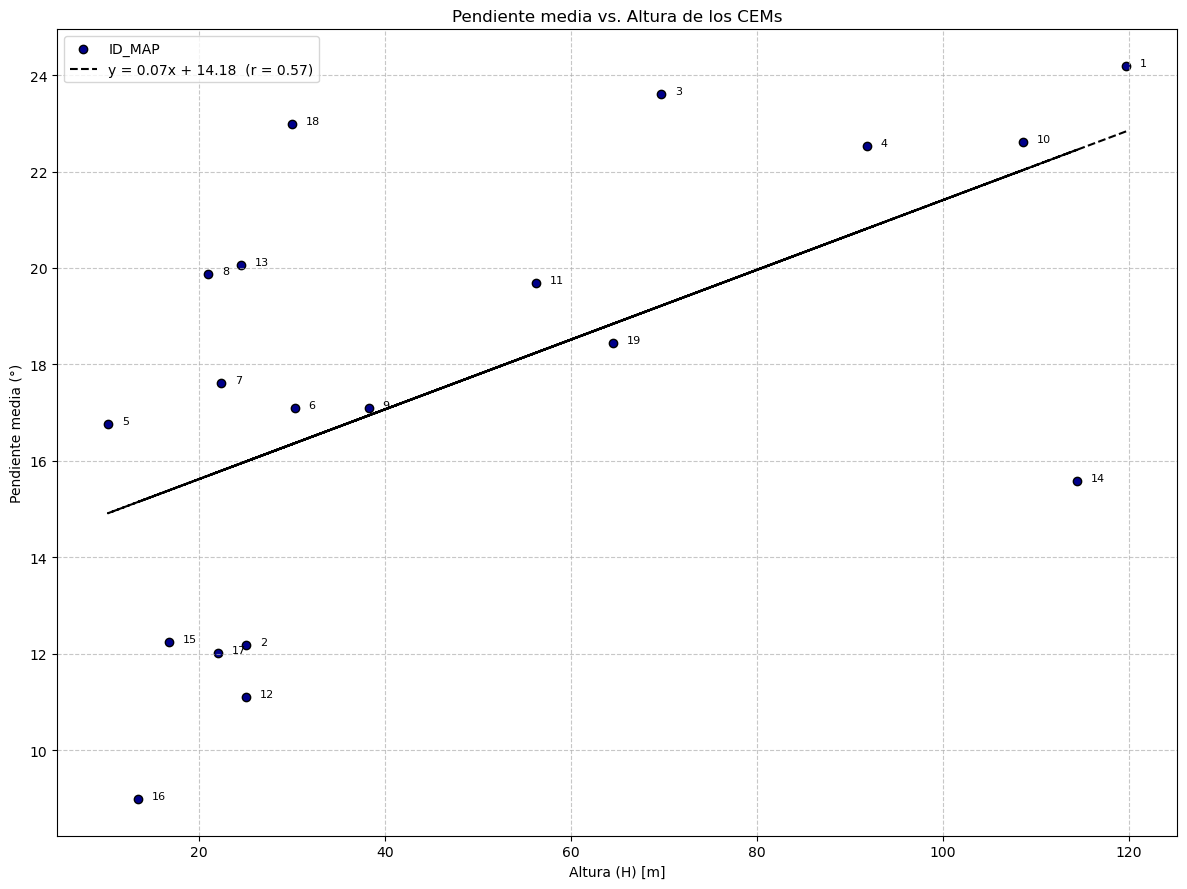

In [4]:
##ploteo de diagramas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

##cargar datos
ruta = r"C:\Users\56931\Documents\MORVOLCFINAL.xlsx"
df_full = pd.read_excel(ruta, sheet_name="Hoja1")

##ajuste filas y columnas
df = df_full.iloc[1:].copy()
df.columns = df_full.iloc[0]
df = df[["Nombres", "ID_Map", "H(m)", "Pend(º)"]].dropna()

##convertir strings a numeros 
df["H(m)"] = pd.to_numeric(df["H(m)"], errors="coerce")
df["Pend(º)"] = pd.to_numeric(df["Pend(º)"], errors="coerce")
df = df.dropna()

##variables a graficar
x = df["H(m)"]
y = df["Pend(º)"]

##regresión lineal
coef = np.polyfit(x, y, 1)
regresion = np.poly1d(coef)
r_value, _ = pearsonr(x, y)

##plot
plt.figure(figsize=(14, 9))
plt.scatter(x, y, color="darkblue", edgecolor="black", label="ID_MAP")
plt.plot(x, regresion(x), color="black", linestyle="--",
         label=f"y = {coef[0]:.2f}x + {coef[1]:.2f}  (r = {r_value:.2f})")

##etiquetas con ID_MAP
for i in range(len(df)):
    plt.text(x.iloc[i] + 1.5, y.iloc[i], str(int(df["ID_Map"].iloc[i])), fontsize=8)

##
plt.xlabel("Altura (H) [m]")
plt.ylabel("Pendiente media (°)")
plt.title("Pendiente media vs. Altura de los CEMs")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.95)
plt.show()



C:\Users\56931\anaconda3\envs\gdal_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


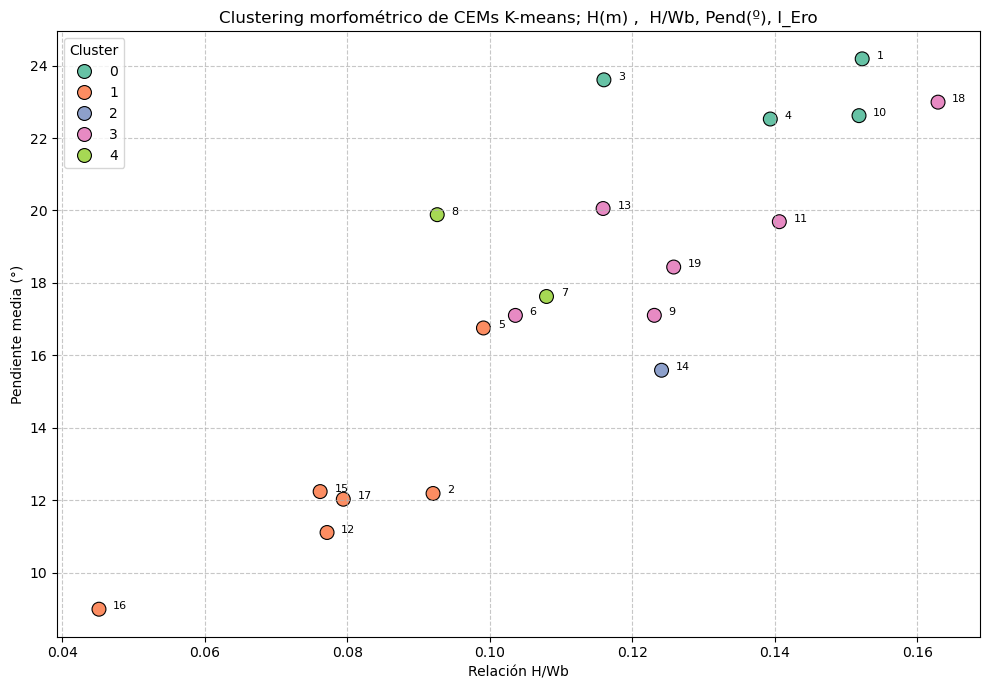

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

##cargar datos
ruta = r"C:\Users\56931\Documents\MORVOLCFINAL.xlsx"
df_full = pd.read_excel(ruta, sheet_name="Hoja1")

##ajuste filas y columnas
df = df_full.iloc[1:].copy()
df.columns = df_full.iloc[0]

##seleccion de variables
cols = ["ID_Map", "H(m)" ,  "H/Wb", "Pend(º)", "I_Ero"]
df = df[cols].dropna()

##convertir strings a numeros
for col in cols[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna()

##normalizacion 
scaler = StandardScaler()
X = scaler.fit_transform(df[cols[1:]])

##K-means clustering; clusters= 5; rs=42 y n_init=10## solo se cambia n_clusters para ver variacion, rs es arbitrario y es por reproducibilidad(puede ser cualquier entero)
##n_init tambien es arbitrario y es por el bajo numero de variables
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

##plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="H/Wb", y="Pend(º)", hue="Cluster", palette="Set2", s=100, edgecolor="black")

##etiquetas con ID_MAP
for i in range(len(df)):
    plt.text(df["H/Wb"].iloc[i] + 0.002, df["Pend(º)"].iloc[i], str(int(df["ID_Map"].iloc[i])), fontsize=8)

##
plt.title("Clustering morfométrico de CEMs K-means; H(m) ,  H/Wb, Pend(º), I_Ero")
plt.xlabel("Relación H/Wb")
plt.ylabel("Pendiente media (°)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


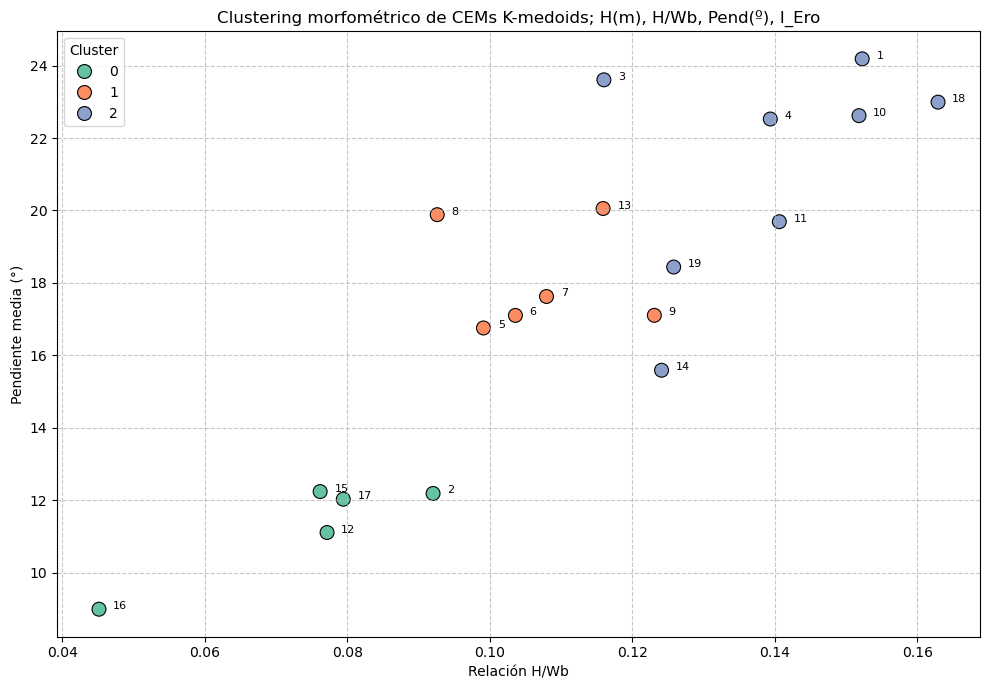

In [6]:
###ahora k-medoids
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids 

##simliar a k-means
ruta = r"C:\Users\56931\Documents\MORVOLCFINAL.xlsx"
df_full = pd.read_excel(ruta, sheet_name="Hoja1")

##
df = df_full.iloc[1:].copy()
df.columns = df_full.iloc[0]

##
cols = ["ID_Map", "H(m)" ,  "H/Wb", "Pend(º)", "I_Ero"]
df = df[cols].dropna()

##
for col in cols[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna()

##
scaler = StandardScaler()
X = scaler.fit_transform(df[cols[1:]])

##cambio a k-medoids
kmedoids = KMedoids(n_clusters=3, metric='euclidean', random_state=42)
df["Cluster"] = kmedoids.fit_predict(X)

##
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="H/Wb", y="Pend(º)", hue="Cluster", palette="Set2", s=100, edgecolor="black")

##
for i in range(len(df)):
    plt.text(df["H/Wb"].iloc[i] + 0.002, df["Pend(º)"].iloc[i], str(int(df["ID_Map"].iloc[i])), fontsize=8)

plt.title("Clustering morfométrico de CEMs K-medoids; H(m), H/Wb, Pend(º), I_Ero")
plt.xlabel("Relación H/Wb")
plt.ylabel("Pendiente media (°)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


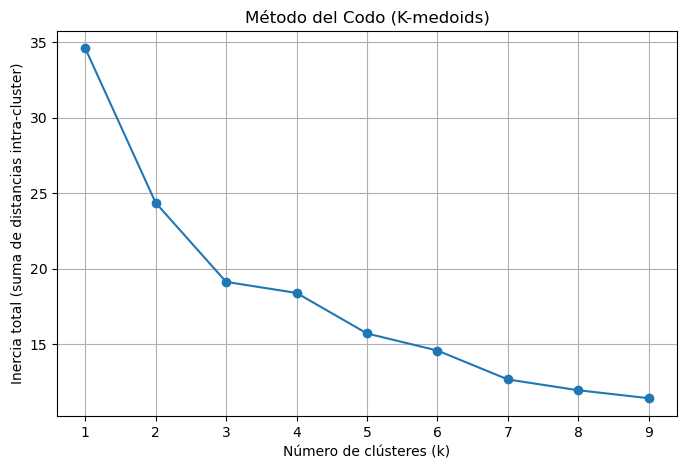

In [13]:
##aplicacion del metodo del codo a k-medoids
##mide cuan compactos son los clusters,por lo que se busca el punto de inflexion==dado que al aumentar el numero de clusters de por si baja la compactacion
## o inercia, se busca el k en el que el cambio tienda a normalizarse, en este caso en 3 la pendiente pasa de negativa a una tendencia a estabilizarse
##por lo que ese seria el punto de inflexion

inertias = []
K = range(1, 10) 
for k in K:
    kmedoids = KMedoids(n_clusters=k, metric='euclidean', random_state=42)
    kmedoids.fit(X)
    inertias.append(kmedoids.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia total (suma de distancias intra-cluster)")
plt.title("Método del Codo (K-medoids)")
plt.grid(True)
plt.show()


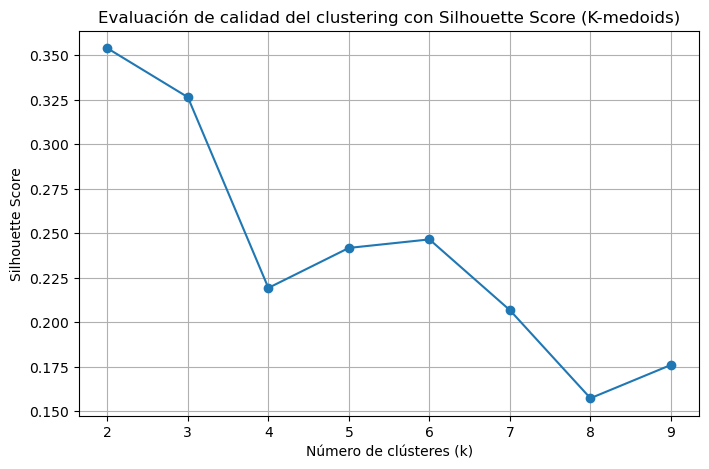

In [7]:
###ahora aplicacion de silhouette
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

##
K = range(2, 10)  
silhouette_scores = []

##
for k in K:
    kmedoids = KMedoids(n_clusters=k, metric='euclidean', random_state=42)
    labels = kmedoids.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

##plot
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Silhouette Score")
plt.title("Evaluación de calidad del clustering con Silhouette Score (K-medoids)")
plt.grid(True)
plt.show()


C:\Users\56931\anaconda3\envs\gdal_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\56931\anaconda3\envs\gdal_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\56931\anaconda3\envs\gdal_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\56931\anaconda3\envs\gdal_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

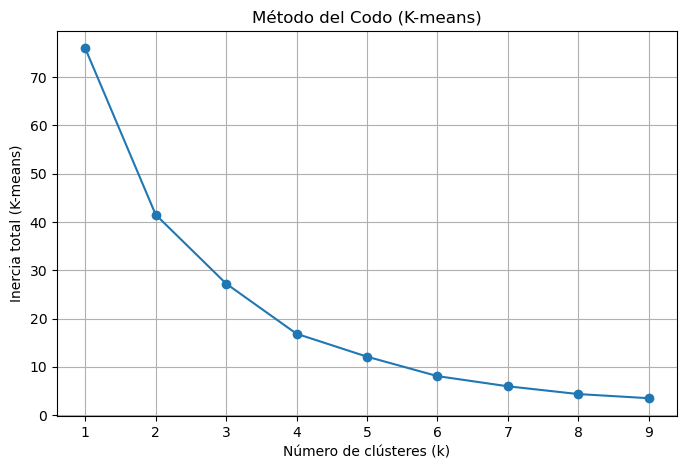

In [10]:
##aplicacion del metodo del codo a k-means

inertias_kmeans = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias_kmeans.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertias_kmeans, marker='o')
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia total (K-means)")
plt.title("Método del Codo (K-means)")
plt.grid(True)
plt.show()


C:\Users\56931\anaconda3\envs\gdal_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\56931\anaconda3\envs\gdal_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\56931\anaconda3\envs\gdal_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\56931\anaconda3\envs\gdal_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

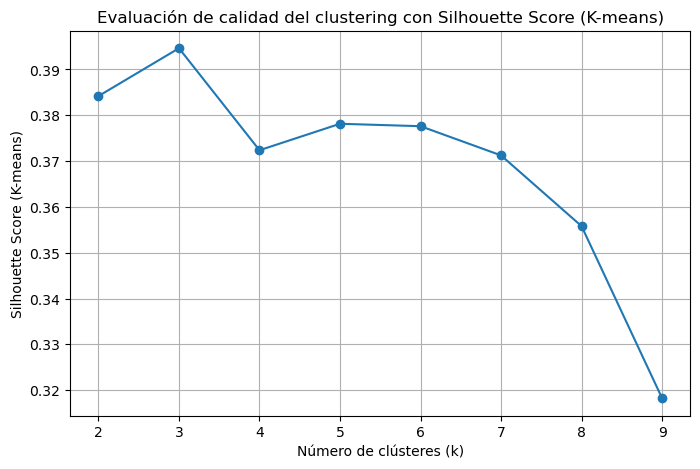

In [11]:
##aplicacion de silhouette a k-means
silhouette_scores_kmeans = []
K_sil = range(2, 10)

for k in K_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_kmeans.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_sil, silhouette_scores_kmeans, marker='o')
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Silhouette Score (K-means)")
plt.title("Evaluación de calidad del clustering con Silhouette Score (K-means)")
plt.grid(True)
plt.show()
